In [1]:
# Import modelflow

%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline

from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()
model.modelflow_auto()



In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Load model and data, and run 

if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1)
from inject import inject
inject(masia)    

Load model


In [4]:
print(masia.equations[:1000])

FRML <> EMU_EXR = EMU_EXR(-1)*(((EMU_INFT-USA_INFT)/100+1))*((-5*((EMU_INT-USA_INT)-(EMU_INT(-1)-USA_INT(-1))))/100+1) + EMU_EXR_A $
FRML <> EMU_INT = EMU_INT(-1)+(USA_INT-USA_INT(-1)) + EMU_INT_A $
FRML <> EMU_INFT = EMU_INFT(-1) + EMU_INFT_A $
FRML <> AFG_HIC = AFG_HIC(-1)*EXP(AFG_HIC_A +  (0.5*((LOG(AFG_HIC(-1)))-(LOG(AFG_HIC(-2))))+0.1*((LOG(AFG_MTD))-(LOG(AFG_MTD(-1))))+0.4*(AFG_INFT/100)+0.375*(AFG_YER/AFG_YFT-AFG_YER(-1)/AFG_YFT(-1))+((LOG(1+AFG_ITAXR))-(LOG(1+AFG_ITAXR(-1))))+0.5*((LOG(1+AFG_GCARB/(0.6*AFG_YEN(-1))))-(LOG(1+AFG_GCARB(-1)/(0.6*AFG_YEN(-2)))))+0.01*(AFG_PREM-AFG_PREM(-1))/100) ) $
FRML <> AFG_YED = AFG_YED(-1)*AFG_HIC/AFG_HIC(-1) + AFG_YED_A $
FRML <> AFG_INT = AFG_INT(-1)+USA_INT-USA_INT(-1) + AFG_INT_A $
FRML <> AFG_LTI = AFG_LTI(-1)+0.5*(AFG_INT-AFG_INT(-1))+(AFG_PREM-AFG_PREM(-1))/100 + AFG_LTI_A $
FRML <> AFG_PREM = AFG_PREM(-1) + AFG_PREM_A $
FRML <> AFG_LNN = AFG_LNN(-1)*EXP(AFG_LNN_A +  (((LOG(AFG_LFN))-(LOG(AFG_LFN(-1))))-0.1*(LOG(AFG_LNN(-1))-LOG(AFG_LF

In [1]:
from dash import dcc

In [3]:
import dash_core_components as dcc
dcc

<module 'dash_core_components' from 'C:\\Users\\ibhan\\Anaconda3\\lib\\site-packages\\dash_core_components\\__init__.py'>

In [5]:
eq = masia.equations
# change the relevant equation to sometinnng else 
# masia_new = model()

In [6]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') and  var.split('_')[0] in masia.countries_ASEAN ]

In [7]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))

In [8]:
masia['rus*'].names

['RUS_CAN',
 'RUS_CANOTH',
 'RUS_CANOTH_A',
 'RUS_CANRATIO',
 'RUS_CANRATIO_A',
 'RUS_CAN_A',
 'RUS_CLIMLOSS',
 'RUS_CLIMLOSS_A',
 'RUS_CMUD',
 'RUS_CMUD_A',
 'RUS_CO2',
 'RUS_CO2_A',
 'RUS_COALC',
 'RUS_COALC_A',
 'RUS_CTAX',
 'RUS_CTAXR',
 'RUS_CTAXR_A',
 'RUS_CTAX_A',
 'RUS_CXS',
 'RUS_CXS_A',
 'RUS_CXUD',
 'RUS_CXUD_A',
 'RUS_DEP',
 'RUS_DEP_A',
 'RUS_EC',
 'RUS_EC_A',
 'RUS_EFEX',
 'RUS_EFEX_A',
 'RUS_EFF',
 'RUS_EFF_A',
 'RUS_ENAB',
 'RUS_ENAB_A',
 'RUS_EXP',
 'RUS_EXPE',
 'RUS_EXPEB',
 'RUS_EXPEB_A',
 'RUS_EXPE_A',
 'RUS_EXPH',
 'RUS_EXPHB',
 'RUS_EXPHB_A',
 'RUS_EXPH_A',
 'RUS_EXPSP',
 'RUS_EXPSPB',
 'RUS_EXPSPB_A',
 'RUS_EXPSP_A',
 'RUS_EXP_A',
 'RUS_EXR',
 'RUS_EXR_A',
 'RUS_EXR_VALUE_2015',
 'RUS_FINC',
 'RUS_FINC_A',
 'RUS_GASC',
 'RUS_GASC_A',
 'RUS_GCARB',
 'RUS_GCARBB',
 'RUS_GCARBB_A',
 'RUS_GCARBR',
 'RUS_GCARBRB',
 'RUS_GCARBRB_A',
 'RUS_GCARBR_A',
 'RUS_GCARB_A',
 'RUS_GCOM',
 'RUS_GCOM_A',
 'RUS_GCR',
 'RUS_GCR_A',
 'RUS_GDFXSH',
 'RUS_GDFXSH_A',
 'RUS_GDI',
 'RUS_G

In [9]:
# Variables to inputwidget

outvar = 'GDI GCARBR CO2 LNN'.split()
displayvar = 'WLD_CO2 ASP_CO2 G20_CO2 '

#  masia.countries_GCARBR_A is list of all countries in the model with a countries_GCARBR_A 
#  masia.countries_ASEAN is list of all countries in ASEAN 
countries_rest = [country for country in masia.countries_GCARBR_A if country not in masia.countries_ASEAN]

slidedef_allasean =  {'All ASEAN countries' : {'var': ' '.join([f'{country}_GCARBR_A' for country in masia.countries_ASEAN ])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_allrest =  {'Rest of the world' : {'var': 
    ' '.join([f'{country}_GCARBR_A' for country in countries_rest])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_countries = {masia.iso_dict.get(country,country)+', Extra' : 
                      {'var': f'{country}_GCARBR_A', 'value': 0.0,'min':-40,'max':40,'op':'+impulse','step':10,'dec':0} 
                      for country in  masia.countries_ASEAN}

slidedef = {**slidedef_allasean,**slidedef_allrest,**slidedef_countries}

# Simulations  with UNESCAP Carbon Pricing Instrument (CPI)  model


# Baseline 
Please wait until charts are shown below. 

# World $CO^2$

# ASEAN $CO^2$

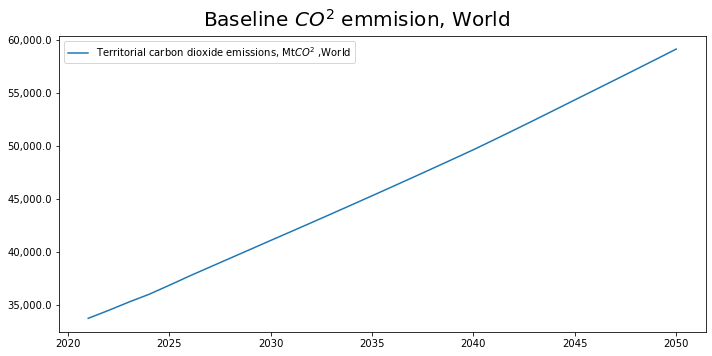

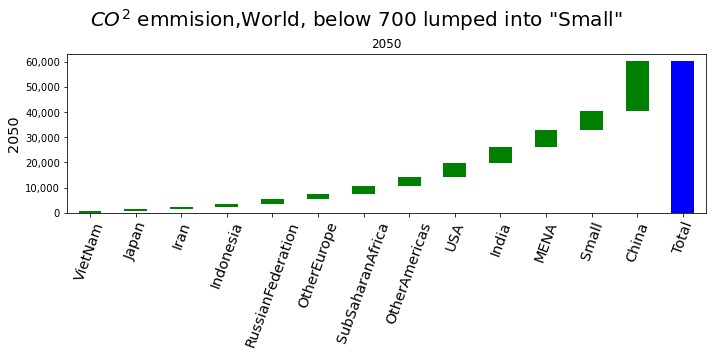

In [10]:
masia['wld_co2'].rename().plot(colrow=1,title='Baseline $CO^2$ emmision, World',top=0.9,ysize=5);

threshold =700
waterplot(co2_baseline.loc[[2050],:].T,autosum=1,threshold = 700,allsort=1,title = f'$CO^2$ emmision,World, below {threshold} lumped into "Small"',top=0.85);

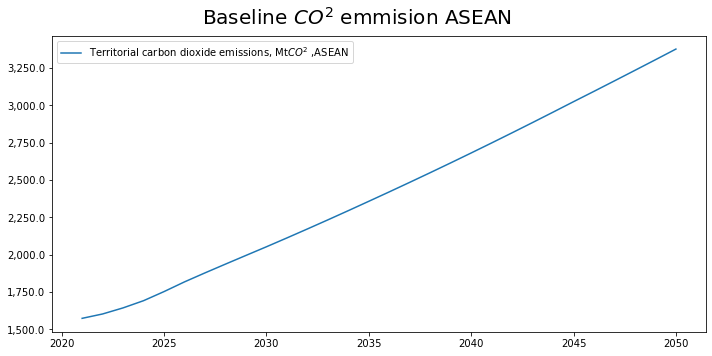

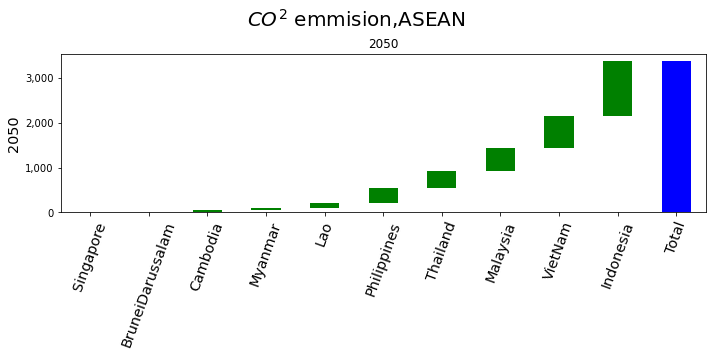

In [11]:
masia['asean_co2'].rename().plot(colrow=1,title='Baseline $CO^2$ emmision ASEAN',top=0.9,ysize=5);

threshold =0.1
waterplot(co2_baseline_asean.loc[[2050],:].T,autosum=1,threshold = 0 ,allsort=1,title = f'$CO^2$ emmision,ASEAN',top=0.85);

# Input Carbon tax rate, US\$ per tonne 

In [12]:
from modelwidget import sumslidewidget,slidewidget, updatewidget, tabwidget,sheetwidget
outvar = 'GDI GCARBR CO2 LNN'.split()
displayvar = 'WLD_CO2 ASP_CO2 G20_CO2'

#  masia.countries_GCARBR_A is list of all countries in the model with a countries_GCARBR_A 
#  masia.countries_ASEAN is list of all countries in ASEAN 
countries_rest = [country for country in masia.countries_GCARBR_A if country not in masia.countries_ASEAN]

slidedef_allasean =  {'All ASEAN countries' : {'var': ' '.join([f'{country}_GCARBR_A' for country in masia.countries_ASEAN ])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_allrest =  {'Rest of the world' : {'var': 
    ' '.join([f'{country}_GCARBR_A' for country in countries_rest])
                          , 'value': 0.0,'min':0,'max':100,'op':'+impulse','step':10,'dec':0}}
slidedef_countries = {masia.iso_dict.get(country,country)+', Extra' : 
                      {'var': f'{country}_GCARBR_A', 'value': 0.0,'min':-40,'max':40,'op':'+impulse','step':10,'dec':5} 
                      for country in  masia.countries_ASEAN}

updatevar = [f'{country}_GCARBR_A' for country in masia.countries_ASEAN ]
smalldf = baseline.loc[2022:2040, updatevar]

tabsharedef = {masia.iso_dict.get(country,country) : sumslidewidget(
                {'Environmental protection':{'var': f'{country}_SHAREE_A', 'value': 0.25,'min':0.0,'max':1,'op':'=','step':0.05,'dec':2} ,
                 'Health'                  :{'var': f'{country}_SHAREH_A', 'value': 0.25,'min':0.0,'max':1,'op':'=','step':0.05,'dec':2} ,
                 'Social protection'       :{'var': f'{country}_SHARESP_A','value': 0.25,'min':0.0,'max':1,'op':'=','step':0.05,'dec':2} ,
                 'Energy efficiency gains' :{'var': f'{country}_SHAREX_A', 'value': 0.25,'min':0.0,'max':1,'op':'=','step':0.05,'dec':2} 
                } , expname='Share (the sum can max be 1.0) of Carbon revenue spent on:', maxsum=1.0)  
               
               for country in masia.countries_ASEAN }


tabdef = {'Areawide Carbon tax 2022'  : slidewidget( {**slidedef_allasean,**slidedef_allrest}),
          'Single country add on 2022': slidewidget(slidedef_countries),
          'Individual tax rates'      : (sheet1 :=  sheetwidget(df_var = smalldf,transpose=0,trans=masia.get_a_country)),
          'Use of carbon tax revenue' : tabwidget(tabdefdict = tabsharedef,tab=True,selected_index = 0)}


wtab = tabwidget(tabdefdict = tabdef,tab=False)
xx = updatewidget(masia,wtab,lwreset=True,varpat = displayvar,outputwidget='keep_viz') # output widget = either keep_viz or jupviz 
xx.wtotal

# Additional information
Press \<shift> \<enter> in the cell's below to compare the $CO^2$ emissions in each county in the Business as usual"

# World reduction 

# ASEAN reduction

In [ ]:
if hasattr(masia,'inputwidget_alternativerun'):
    Threshold =199
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);
else:
    display(Markdown('# Try make an alternative and run again'))

In [ ]:
if hasattr(masia,'inputwidget_alternativerun'):
    Threshold =0.01
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);
else:
    display(Markdown('# Try make an alternative and run again'))